In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the train csv file
train = pd.read_csv('application_train.csv')
print(train.shape)

(307511, 122)


In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#read the test csv file
test = pd.read_csv('application_test.csv')
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#we can see this is an unbalanced dataset
train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

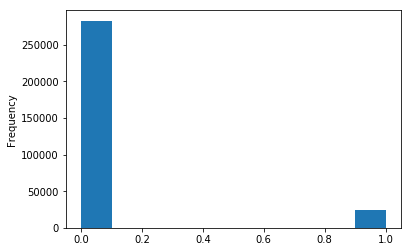

In [6]:
#train['TARGET'].plot.hist()
train['TARGET'].astype(int).plot.hist()
#Because the target value of 0 is less than 0.1 of the value of 1
#We can't drop the 1s to be the balanced dataset,
#Let's just leave this dataset here, to see if any bad result happens

In [7]:
#let's see if there is any missing value
miss_v = train.isnull().sum()

In [8]:
miss_v.head()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
dtype: int64

In [9]:
miss_v_percent = 100 * miss_v / train.shape[0]
miss_v_percent.head(10)

SK_ID_CURR            0.000000
TARGET                0.000000
NAME_CONTRACT_TYPE    0.000000
CODE_GENDER           0.000000
FLAG_OWN_CAR          0.000000
FLAG_OWN_REALTY       0.000000
CNT_CHILDREN          0.000000
AMT_INCOME_TOTAL      0.000000
AMT_CREDIT            0.000000
AMT_ANNUITY           0.003902
dtype: float64

In [10]:
#Let's combine these two tables
miss_v_table = pd.concat([miss_v, miss_v_percent], axis = 1)
miss_v_table.head(10)

,0,1
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.003902


In [11]:
new_table = miss_v_table.rename(columns = {0: "Count", 1:"Percent"})
new_table.head(10)

,Count,Percent
SK_ID_CURR,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,12,0.003902


In [12]:
new = new_table.sort_values("Percent", ascending = False)
new.head(10)
#We now can see the missing values.
#However we can't impute missing values here, because we don't know
#the meaning of the attributes here.

,Count,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [13]:
#See how many different discrete variables in a column
#train.select_dtypes(include = ['object']).apply(pd.Series.nunique, axis = 0)

In [14]:
'''
label = LabelEncoder()
count = 0 # Count how many features would apply label encoding?
for col in train:
    if train[col].dtype == 'object':
        if len(list(train[col].unique())) <= 2:
            label.fit(train[col])
            train[col] = label.transform(train[col])
            #test[col] = label.transform([test[col]])
            count += 1
count
'''

"\nlabel = LabelEncoder()\ncount = 0 # Count how many features would apply label encoding?\nfor col in train:\n    if train[col].dtype == 'object':\n        if len(list(train[col].unique())) <= 2:\n            label.fit(train[col])\n            train[col] = label.transform(train[col])\n            #test[col] = label.transform([test[col]])\n            count += 1\ncount\n"

In [15]:
#one-hot encoding
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [16]:
print(train.shape)
print(test.shape)

(307511, 246)
(48744, 242)


In [17]:
#after the one-hot encoding,
#the number of features in train dataset is not the same as
#the number of features in test dataset
#So we need to make the columns of these two datasets to be equal
train_labels = train['TARGET']
train, test = train.align(test, join = 'inner', axis = 1)
train['TARGET'] = train_labels
print("features in train dataset: " + str(train.shape[1]))
print("features in test dataset: " + str(test.shape[1]))

features in train dataset: 243
features in test dataset: 242


In [18]:
#In the following steps, let's focus on the anomalies data analysis

In [19]:
(train["DAYS_BIRTH"]/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [20]:
(train["DAYS_EMPLOYED"]/-365).describe()
#There is no way that someone has worked for negative 1000 years

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,'Years Employed')

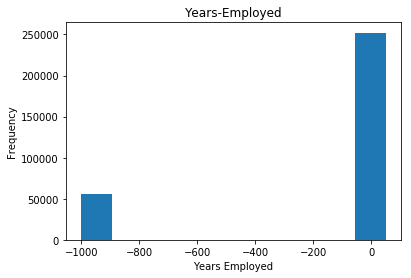

In [21]:
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years-Employed')
plt.xlabel('Years Employed')

In [22]:
#As we can see from the plot, all the anomalies data are from "356243"
train['DAYS_EMPLOYED'].value_counts().head()

 365243    55374
-200         156
-224         152
-199         151
-230         151
Name: DAYS_EMPLOYED, dtype: int64

In [23]:
anom = train[train['DAYS_EMPLOYED'] == 365243]
non_anom = train[train['DAYS_EMPLOYED'] != 365243]
print("Percent of oberservations can't pay off the loan by time (anomalies) is " + str(anom['TARGET'].mean()))
print("Percent of oberservations can't pay off the loan by time (anomalies) is " + str(non_anom['TARGET'].mean()))

Percent of oberservations can't pay off the loan by time (anomalies) is 0.05399646043269404
Percent of oberservations can't pay off the loan by time (anomalies) is 0.0865997453765215


In [24]:
len(anom)

55374

Text(0.5,0,'Years Employment')

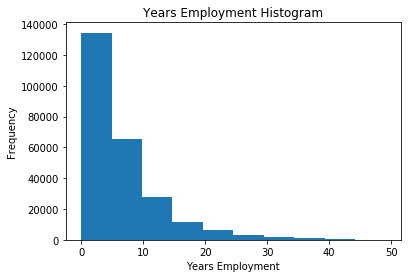

In [25]:
#since there are 55374 obeservations in the dataset,
#so that we can't drop these records directly
train['DAYS_EMPLOYED_NEW'] = train['DAYS_EMPLOYED'] == 365243
# use np.nan to replace the anom values
train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)
(train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel('Years Employment')

In [26]:
test['DAYS_EMPLOYED_ANOM'] = test['DAYS_EMPLOYED'] == 365243
test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
print("Number of anom values in test dataset: " + str(test['DAYS_EMPLOYED_ANOM'].sum()))

Number of anom values in test dataset: 9274


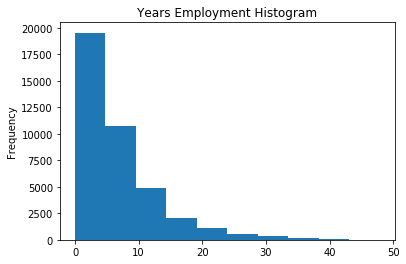

In [27]:
(test['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')

In [28]:
#Next, let's take a look at the correlations of the Target with each attribute
co = train.corr()['TARGET'].sort_values()
co.head()

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
Name: TARGET, dtype: float64

In [29]:
co.tail(10)

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
CODE_GENDER_M                  0.054713
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.074958
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

In [30]:
#Feature engineering

In [31]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures

In [32]:
#let's see the columns of the dataset before the feature engineering
print(train.shape[1],test.shape[1])

244 243


In [33]:
#Because 'EXIT_SOURCE' and 'DAYS_BIRTH' are the most correlated with the target values,
#Next I will use "EXIT_SOURCE_(1,2,3)" and "DAYS_BIRTH" to create new features.
selected_features = train[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
selected_features_test = test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]

#There are missing values, so we use median number to replace the missing values
impute = Imputer(strategy = 'median')
new_features = impute.fit_transform(selected_features)
new_features_test = impute.fit_transform(selected_features)

poly_transformer = PolynomialFeatures(degree = 3)
poly_transformer.fit(new_features)

poly_features = poly_transformer.transform(new_features)
poly_features_test = poly_transformer.transform(new_features_test)

In [34]:
poly_features.shape

(307511, 35)

In [35]:
poly_features_names = poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH'])
poly_features_names

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [36]:
poly_features = pd.DataFrame(poly_features, columns = poly_features_names)
poly_features['TARGET'] = train['TARGET']

#Add the new columns to the tran dataset
poly_features['SK_ID_CURR'] = train['SK_ID_CURR']
poly_train = train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [37]:
poly_features_test = pd.DataFrame(poly_features, columns = poly_features_names)

#Add the new columns to the test dataset
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
poly_test = test.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [38]:
#align these two datasets
poly_train, poly_test = poly_train.align(poly_test, join = 'inner', axis = 1)
print(poly_train.shape, poly_test.shape)

(307511, 277) (48744, 277)


In [39]:
#As you see, both datasets have 277 attributes
#Because there should be a target column in the train dataset
poly_train['TARGET'] = train['TARGET']
poly_train.shape

(307511, 278)

In [40]:
#save the dataframe to CSV
#poly_train.to_csv('poly_train.csv', index = False)
#poly_test.to_csv('poly_test.csv', index = False)

In [41]:
#We will use different algorithms to train the train dataset in the following part
#Firstly, let's impute the missing values
#poly_train = pd.read_csv('poly_train.csv')
#poly_test = pd.read_csv('poly_test.csv')
poly_train.isnull().sum()

SK_ID_CURR                                     0
CNT_CHILDREN                                   0
AMT_INCOME_TOTAL                               0
AMT_CREDIT                                     0
AMT_ANNUITY                                   12
AMT_GOODS_PRICE                              278
REGION_POPULATION_RELATIVE                     0
DAYS_BIRTH_x                                   0
DAYS_EMPLOYED                              55374
DAYS_REGISTRATION                              0
DAYS_ID_PUBLISH                                0
OWN_CAR_AGE                               202929
FLAG_MOBIL                                     0
FLAG_EMP_PHONE                                 0
FLAG_WORK_PHONE                                0
FLAG_CONT_MOBILE                               0
FLAG_PHONE                                     0
FLAG_EMAIL                                     0
CNT_FAM_MEMBERS                                2
REGION_RATING_CLIENT                           0
REGION_RATING_CLIENT

In [42]:
print(poly_train.shape, poly_test.shape)

(307511, 278) (48744, 277)


In [43]:
target = poly_train['TARGET']
id = poly_test[['SK_ID_CURR']]
poly_train = poly_train.drop(['TARGET'], 1)

In [44]:
print(poly_train.shape, poly_test.shape)

(307511, 277) (48744, 277)


In [45]:
'''
imputer = Imputer(strategy = 'median')
poly_train = imputer.fit_transform(poly_train)
poly_test = imputer.fit_transform(poly_test)
'''
imputer = Imputer(strategy = 'median')
imputer.fit(poly_train)
poly_train = imputer.transform(poly_train)
poly_test = imputer.transform(poly_test)

In [46]:
print(poly_train.shape, poly_test.shape)

(307511, 277) (48744, 277)


In [47]:
from sklearn.linear_model import LogisticRegression
LogisticR = LogisticRegression(C = 0.0001, class_weight = 'balanced')
LogisticR.fit(poly_train, target)
LR_pred =  LogisticR.predict_proba(poly_test)[:,1]
final = id.copy()
final['TARGET'] = LR_pred
final.to_csv('LR.csv', index = False)

In [48]:
from sklearn import tree
Dtree = tree.DecisionTreeClassifier()
final_tree = Dtree.fit(poly_train, target)

In [50]:
final_list = final_tree.predict(poly_test)

In [51]:
len(final_list)

48744

In [53]:
final_list[:30]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [54]:
final_file = id.copy()
final_file['TARGET'] = final_list
final.to_csv('DT.csv', index = False)

In [ ]:
# To do:
#1. dig more in data analytics
#2. Try different ways in Feature engineering